## 1.7 Creating Network Visualizations

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
!pip install pyvis

  Using cached jsonpickle-4.0.2-py3-none-any.whl.metadata (8.2 kB)
   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   ---------------------------------------- 756.0/756.0 kB 8.0 MB/s eta 0:00:00
Using cached jsonpickle-4.0.2-py3-none-any.whl (46 kB)


In [6]:
# Create path to import relationship data
directory = r'C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python'

In [7]:
file_path = os.path.join(directory, 'updated_relationshipdf.csv')

In [8]:
# Import relationship data

relationship_df = pd.read_csv(file_path, index_col=None)

In [9]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,21
2,Germany,Ukraine,10
3,Germany,Italy,33
4,Germany,Spain,1
...,...,...,...
70,Canada,Japan,5
71,Canada,Russia,1
72,India,South Africa,1
73,Germany,Norway,6


### Creating a static network graph using NetworkX

In [10]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

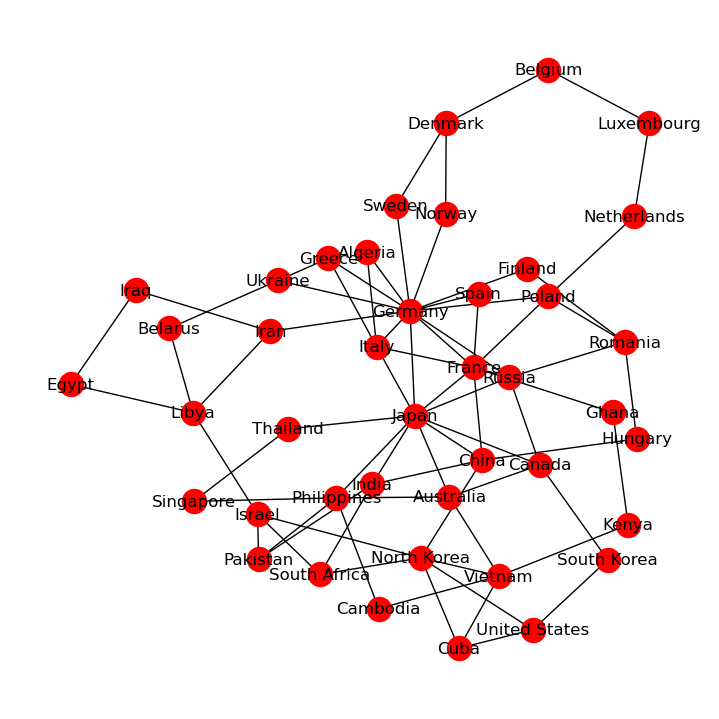

In [11]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

### Building an interactive network graph using pyvis

In [12]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

countries.html


In [19]:
# Save the graph as an html
html_file_path = r"C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python/countries.html"

In [20]:
# Save the HTML file
net.save_graph(html_file_path)

### Apply Leiden algorithm to detect communities within countries

In [22]:
!pip install cdlib

  Using cached cdlib-0.4.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached demon-2.0.6-py3-none-any.whl.metadata (5.1 kB)
  Using cached python-louvain-0.16.tar.gz (204 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached PuLP-3.0.2-py3-none-any.whl.metadata (6.7 kB)
  Using cached eva_lcd-0.1.1-py3-none-any.whl.metadata (731 bytes)
  Using cached bimlpa-0.1.2-py3-none-any.whl.metadata (725 bytes)
  Using cached python_igraph-0.11.8-py3-none-any.whl.metadata (2.8 kB)
  Using cached angelcommunity-2.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached dynetx-0.3.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached thresholdclustering-1.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached python_Levenshtein-0.26.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached igraph-0.11.8-cp39-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached texttable-1.7.0-py2.py3-non

In [24]:
!pip install igraph leidenalg

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 14.0 MB/s eta 0:00:00


In [25]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [26]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [27]:
new_com = coms.to_node_community_map()

In [28]:
new_com

defaultdict(list,
            {'France': [0],
             'Germany': [0],
             'Ukraine': [0],
             'Italy': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Greece': [0],
             'Algeria': [0],
             'Romania': [0],
             'Hungary': [0],
             'China': [1],
             'India': [1],
             'Pakistan': [1],
             'Israel': [1],
             'North Korea': [1],
             'South Africa': [1],
             'Cuba': [1],
             'United States': [1],
             'South Korea': [1],
             'Russia': [2],
             'Japan': [2],
             'Thailand': [2],
             'Singapore': [2],
             'Philippines': [2],
             'Australia': [2],
             'Canada': [2],
             'Netherlands': [3],
             'Luxembourg': [3],
             'Belgium': [3],
             'Denmark': [3],
             'Norway': [3],
             'Sweden': [3],
          

In [29]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [30]:
dict_com

{'France': 0,
 'Germany': 0,
 'Ukraine': 0,
 'Italy': 0,
 'Spain': 0,
 'Poland': 0,
 'Finland': 0,
 'Greece': 0,
 'Algeria': 0,
 'Romania': 0,
 'Hungary': 0,
 'China': 1,
 'India': 1,
 'Pakistan': 1,
 'Israel': 1,
 'North Korea': 1,
 'South Africa': 1,
 'Cuba': 1,
 'United States': 1,
 'South Korea': 1,
 'Russia': 2,
 'Japan': 2,
 'Thailand': 2,
 'Singapore': 2,
 'Philippines': 2,
 'Australia': 2,
 'Canada': 2,
 'Netherlands': 3,
 'Luxembourg': 3,
 'Belgium': 3,
 'Denmark': 3,
 'Norway': 3,
 'Sweden': 3,
 'Belarus': 4,
 'Libya': 4,
 'Egypt': 4,
 'Iraq': 4,
 'Iran': 4,
 'Cambodia': 5,
 'Vietnam': 5,
 'Kenya': 5,
 'Ghana': 5}

In [31]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

country_communities_leiden.html


The communities seem to reflect the closest relationships between countries, good or bad. It seems to be based on the frequency of interactions with each other.

The blue community is highly affected by the events of World War 2, with Germany having a large node in the community as the leading force of the axis powers during the war, connected with Italy who was an ally to Germany. France and Poland are connected as they were apart of the allied powers fighting against the axis powers. 

Japan is highly connected with Germany as well as another ally to Germany during the war, but Japan falls under the yellow community with the largest node. The yellow community shows other countries being connected with Japan based on alliances and occupations during and after WW2.

The red community seems to highly reflect enemies and alliances during the Korean War, with North Korea being the largest node in the red community. United States and Cuba are connected likely because of the Cuban missle crisis, but the line is very thin, which indicates that it was not a big topic in the article. 

The purple community reflects countries in the middle east with political and economical similarities during the 20th century.

The green community seems to reflect that these countries have a relationship together which may be due to economic and political interests during the 20th century.

The pink community seems to reflect countries that did not play a big part in wars, but were heavily effected by WW1 and WW2. 

In [32]:
# Save the graph as an html
html_file_path = r"C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python/country_communities_leiden.html"

In [33]:
# Save the HTML file
net.save_graph(html_file_path)

### Calculating and visualizing the degree, closeness, and betweenness centrality measures of the countries

In [34]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.1951219512195122,
 'Russia': 0.12195121951219512,
 'Germany': 0.3170731707317073,
 'Ukraine': 0.07317073170731708,
 'Italy': 0.12195121951219512,
 'Spain': 0.04878048780487805,
 'Poland': 0.0975609756097561,
 'Finland': 0.04878048780487805,
 'Netherlands': 0.04878048780487805,
 'Luxembourg': 0.04878048780487805,
 'Belgium': 0.04878048780487805,
 'Denmark': 0.07317073170731708,
 'Norway': 0.04878048780487805,
 'Sweden': 0.04878048780487805,
 'Greece': 0.07317073170731708,
 'Belarus': 0.04878048780487805,
 'Libya': 0.0975609756097561,
 'Egypt': 0.04878048780487805,
 'Iraq': 0.04878048780487805,
 'Iran': 0.07317073170731708,
 'Japan': 0.24390243902439024,
 'Algeria': 0.04878048780487805,
 'China': 0.12195121951219512,
 'Thailand': 0.04878048780487805,
 'Singapore': 0.04878048780487805,
 'Philippines': 0.12195121951219512,
 'Australia': 0.0975609756097561,
 'India': 0.0975609756097561,
 'Pakistan': 0.07317073170731708,
 'Israel': 0.0975609756097561,
 'North Korea': 0.146341463

In [35]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

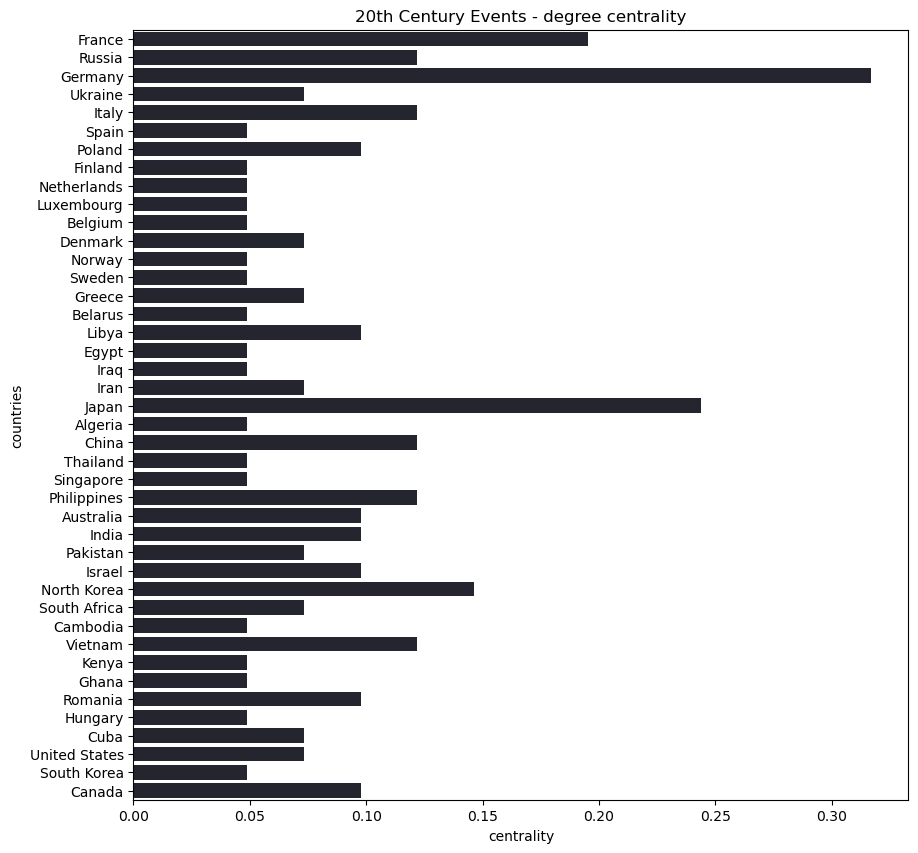

In [56]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century Events - degree centrality")


Germany, Japan, and France have the highest degree of centrality. During World War 1 and World War 2, Germany and France were the leading enemies, and during WW2 Japan became a large power in the war. Along with many other events, the 20th century events article is centered mostly around these countries.

In [38]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [39]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

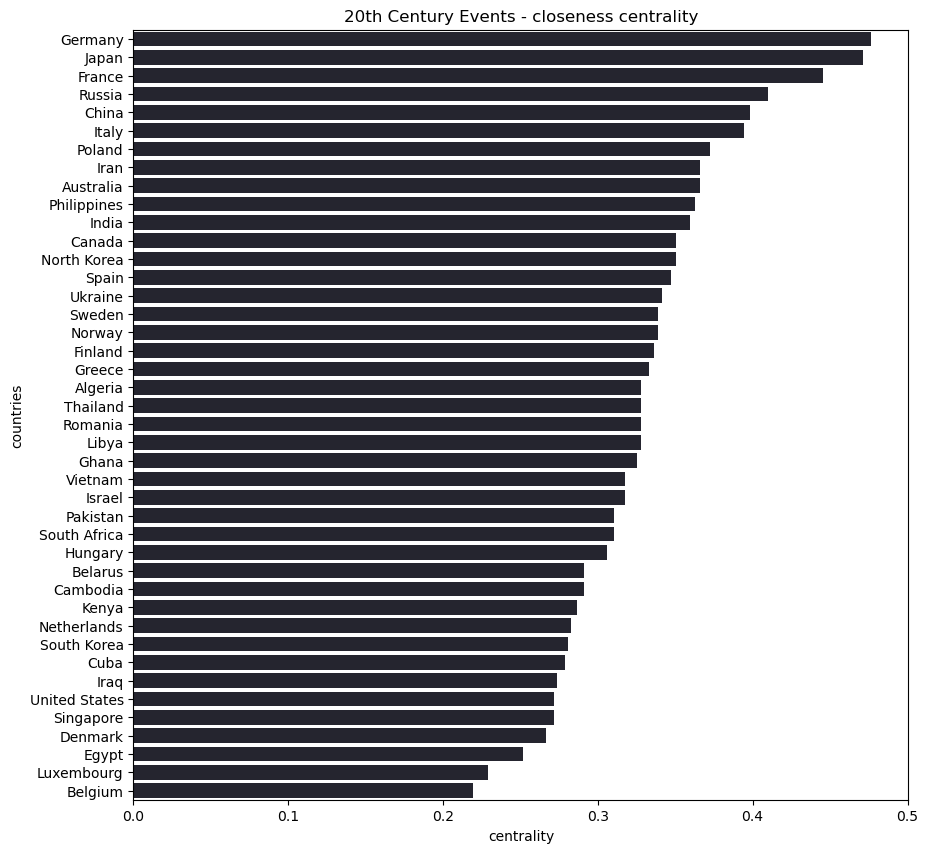

In [58]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century Events - closeness centrality")

This bar graph displaying closeness centrality further depicts what the network graph and the degree of centrality bar graph were showing in the closeness of the relationships between the countries.

In [41]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [42]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

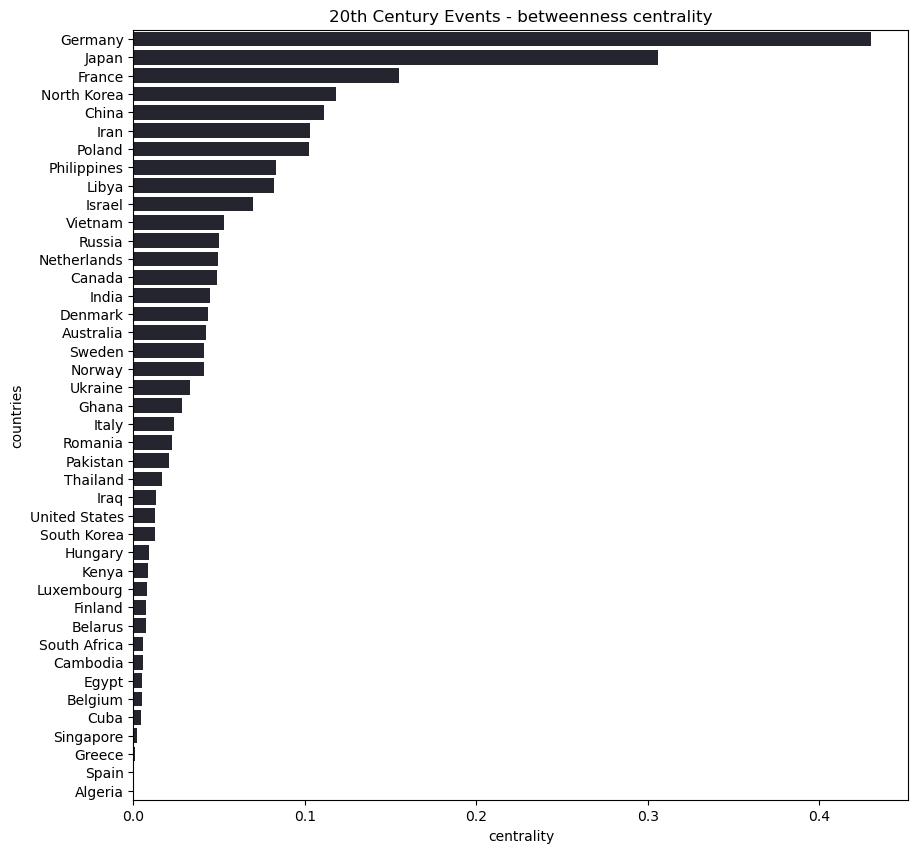

In [60]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century Events - betweenness centrality")

This bar graph showing betweenness centrality further elaborates the countries with the largest nodes, having the most relationships with different countries and communities. Germany, Japan, and France being at the top of this list as well.

In [44]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [59]:
output_directory = r'C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python'